In [46]:
#importing libraries
import sys
import pandas as pd
import sklearn
import keras
import numpy as np

In [47]:
data=pd.read_csv('age_18+.csv')
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [48]:
'''
ax=data.plot.hist(stacked=True, bins=20);
ax.set_xlabel('Class',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
'''

"\nax=data.plot.hist(stacked=True, bins=20);\nax.set_xlabel('Class',fontsize=12)\nax.set_ylabel('Frequency',fontsize=12)\n"

In [49]:
data.shape

(704, 21)

In [50]:
# print the shape of the DataFrame, so we can see how many examples we have
print(data.loc[0])

A1_Score                        1
A2_Score                        1
A3_Score                        1
A4_Score                        1
A5_Score                        0
A6_Score                        0
A7_Score                        1
A8_Score                        1
A9_Score                        0
A10_Score                       0
age                          26.0
gender                          f
ethnicity          White-European
jundice                        no
austim                         no
contry_of_res       United States
used_app_before                no
result                          6
age_desc              18 and more
relation                     Self
Class/ASD                      NO
Name: 0, dtype: object


In [51]:
data.isnull().sum()

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  2
gender               0
ethnicity            0
jundice              0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation             0
Class/ASD          231
dtype: int64

In [52]:
data=data.dropna()

In [53]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [54]:
data['Class/ASD'].value_counts()

NO     282
YES    189
Name: Class/ASD, dtype: int64

In [55]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,0.751592,0.520170,0.524416,0.613588,0.573248,0.354565,0.469214,0.656051,0.416136,0.632696,31.271762,5.511677
std,0.432549,0.500124,0.499934,0.487445,0.495131,0.478890,0.499582,0.475529,0.493441,0.482583,19.208000,2.625443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,29.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [56]:
# drop unwanted columns
data = data.drop(['result','age_desc','relation','used_app_before','contry_of_res','gender'], axis=1)

In [57]:
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,austim,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,White-European,no,no,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,Latino,no,yes,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,Latino,yes,yes,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,White-European,no,yes,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,?,no,no,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,Others,yes,no,YES
6,0,1,0,0,0,0,0,1,0,0,17.0,Black,no,no,NO
7,1,1,1,1,0,0,0,0,1,0,64.0,White-European,no,no,NO
8,1,1,0,0,1,0,0,1,1,1,29.0,White-European,no,no,NO
9,1,1,1,1,0,1,1,1,1,0,17.0,Asian,yes,yes,YES


In [58]:
data.dtypes

A1_Score       int64
A2_Score       int64
A3_Score       int64
A4_Score       int64
A5_Score       int64
A6_Score       int64
A7_Score       int64
A8_Score       int64
A9_Score       int64
A10_Score      int64
age          float64
ethnicity     object
jundice       object
austim        object
Class/ASD     object
dtype: object

In [59]:
#data['age']=data['age'].astype(int)

In [60]:
data1=data.rename(columns = {'Class/ASD':'Class'}, inplace = True)

In [61]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,austim,Class
0,1,1,1,1,0,0,1,1,0,0,26.0,White-European,no,no,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,Latino,no,yes,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,Latino,yes,yes,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,White-European,no,yes,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,?,no,no,NO


In [62]:
data['age'] = data['age'].astype(int)

In [63]:
data = data[(data['age'] >= 18) & (data['age'] <= 60)]

In [64]:
data['age'].value_counts()

21    28
19    25
22    22
30    22
20    22
28    21
27    20
29    20
23    20
18    19
24    16
26    15
31    15
25    14
35    14
32    14
40    12
37    11
36    11
38    10
42    10
44    10
33    10
43     9
34     9
47     7
53     6
46     6
55     5
52     5
50     4
39     4
45     3
49     3
41     3
56     2
48     2
58     1
59     1
60     1
54     1
51     1
Name: age, dtype: int64

In [65]:
# create X and Y datasets for training
x= data.drop(columns=['Class'])
y = data['Class']

In [66]:
x.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,austim
0,1,1,1,1,0,0,1,1,0,0,26,White-European,no,no
1,1,1,0,1,0,0,0,1,0,1,24,Latino,no,yes
2,1,1,0,1,1,0,1,1,1,1,27,Latino,yes,yes
3,1,1,0,1,0,0,1,1,0,1,35,White-European,no,yes
4,1,0,0,0,0,0,0,1,0,0,40,?,no,no
5,1,1,1,1,1,0,1,1,1,1,36,Others,yes,no
8,1,1,0,0,1,0,0,1,1,1,29,White-European,no,no
10,1,1,1,1,1,1,1,1,1,1,33,White-European,no,no


In [67]:
# convert the data to categorical values - one-hot-encoded vectors
X = pd.get_dummies(x)

In [68]:
# print the new categorical column labels
X.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'ethnicity_?', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino',
       'ethnicity_Middle Eastern ', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish',
       'ethnicity_White-European', 'ethnicity_others', 'jundice_no',
       'jundice_yes', 'austim_no', 'austim_yes'], dtype=object)

In [69]:
# print an example patient from the categorical data
X.loc[1]

A1_Score                      1
A2_Score                      1
A3_Score                      0
A4_Score                      1
A5_Score                      0
A6_Score                      0
A7_Score                      0
A8_Score                      1
A9_Score                      0
A10_Score                     1
age                          24
ethnicity_?                   0
ethnicity_Asian               0
ethnicity_Black               0
ethnicity_Hispanic            0
ethnicity_Latino              1
ethnicity_Middle Eastern      0
ethnicity_Others              0
ethnicity_Pasifika            0
ethnicity_South Asian         0
ethnicity_Turkish             0
ethnicity_White-European      0
ethnicity_others              0
jundice_no                    1
jundice_yes                   0
austim_no                     0
austim_yes                    1
Name: 1, dtype: int64

In [70]:
# convert the class data to categorical values - one-hot-encoded vectors
Y = pd.get_dummies(y)

In [71]:
Y.iloc[:10]

,NO,YES
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,0,1
8,1,0
10,0,1
30,1,0
31,0,1


In [72]:
print(data['Class'].value_counts(ascending=True))

YES    183
NO     271
Name: Class, dtype: int64


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X)
vectorizer.vocabulary_

{'A1_Score': 1,
 'A2_Score': 2,
 'A3_Score': 3,
 'A4_Score': 4,
 'A5_Score': 5,
 'A6_Score': 6,
 'A7_Score': 7,
 'A8_Score': 8,
 'A9_Score': 9,
 'A10_Score': 0,
 'age': 13,
 'ethnicity_': 16,
 'ethnicity_Asian': 17,
 'ethnicity_Black': 18,
 'ethnicity_Hispanic': 19,
 'ethnicity_Latino': 20,
 'ethnicity_Middle': 21,
 'Eastern': 11,
 'ethnicity_Others': 22,
 'ethnicity_Pasifika': 23,
 'ethnicity_South': 24,
 'Asian': 10,
 'ethnicity_Turkish': 25,
 'ethnicity_White': 26,
 'European': 12,
 'ethnicity_others': 27,
 'jundice_no': 28,
 'jundice_yes': 29,
 'austim_no': 14,
 'austim_yes': 15}

In [74]:
vectorizer.transform(X).toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
# split the X and Y data into training and testing dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2,random_state=42)

In [76]:
from keras.layers.pooling.max_pooling1d import MaxPool1D
# build a neural network using Keras
input_dim = X_train.shape[1]
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Conv1D, GlobalMaxPool1D, Dense

# define a function to build the keras model

def create_model():
    # create model
    model = Sequential()
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))

    model.add(GlobalMaxPool1D())
    model.add(Dense(8, input_shape=(96, 1), kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(2, activation='sigmoid'))


    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = create_model()


In [77]:

model.build(input_shape=(None, 96, 1))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 92, 128)           768       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 91, 128)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 87, 128)           82048     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 86, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 82, 128)           82048     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 81, 128)         

In [78]:
# fit the model to the train
history=model.fit(X_train, Y_train, epochs=20, batch_size=10,validation_data=(X_test, Y_test), verbose = 1)

Epoch 1/20


2023-07-27 11:50:53.765736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 1s 19ms/step - loss: 0.7258 - accuracy: 0.6088 - val_loss: 0.6928 - val_accuracy: 0.5275
Epoch 2/20
 1/37 [..............................] - ETA: 0s - loss: 0.6919 - accuracy: 0.6000

2023-07-27 11:50:54.468144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


37/37 [==============================] - 0s 10ms/step - loss: 0.6906 - accuracy: 0.6143 - val_loss: 0.6924 - val_accuracy: 0.5275
Epoch 3/20
37/37 [==============================] - 0s 9ms/step - loss: 0.6887 - accuracy: 0.6143 - val_loss: 0.6920 - val_accuracy: 0.5275
Epoch 4/20
37/37 [==============================] - 0s 9ms/step - loss: 0.6869 - accuracy: 0.6143 - val_loss: 0.6919 - val_accuracy: 0.5275
Epoch 5/20
37/37 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.6143 - val_loss: 0.6917 - val_accuracy: 0.5275
Epoch 6/20
37/37 [==============================] - 0s 9ms/step - loss: 0.6837 - accuracy: 0.6143 - val_loss: 0.6916 - val_accuracy: 0.5275
Epoch 7/20
37/37 [==============================] - 0s 9ms/step - loss: 0.6822 - accuracy: 0.6143 - val_loss: 0.6917 - val_accuracy: 0.5275
Epoch 8/20
37/37 [==============================] - 0s 10ms/step - loss: 0.6807 - accuracy: 0.6143 - val_loss: 0.6917 - val_accuracy: 0.5275
Epoch 9/20
37/37 [===========

In [79]:
#generate classification report using predictions for categorical model

from sklearn.metrics import classification_report, accuracy_score

predictions = model.predict(X_test).round()
classes=np.argmax(predictions,axis=1)
predictions

3/3 [==============================] - 0s 16ms/step


2023-07-27 11:51:01.343965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [80]:
score = accuracy_score(Y_test,predictions)
score

0.5274725274725275

In [81]:
print('Results for Categorical Model')
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Results for Categorical Model
0.5274725274725275
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        48
           1       0.00      0.00      0.00        43

   micro avg       0.53      0.53      0.53        91
   macro avg       0.26      0.50      0.35        91
weighted avg       0.28      0.53      0.36        91
 samples avg       0.53      0.53      0.53        91



/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6143
Testing Accuracy:  0.5275


In [38]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

3/3 - 0s - loss: 0.6950 - accuracy: 0.5275 - 27ms/epoch - 9ms/step


In [39]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

3/3 - 0s - loss: 0.6950 - accuracy: 0.5275 - 24ms/epoch - 8ms/step


In [40]:
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


Test Loss 0.6950039267539978
Test Accuracy 0.5274725556373596


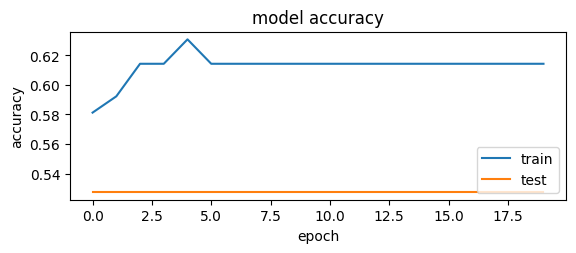

In [41]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


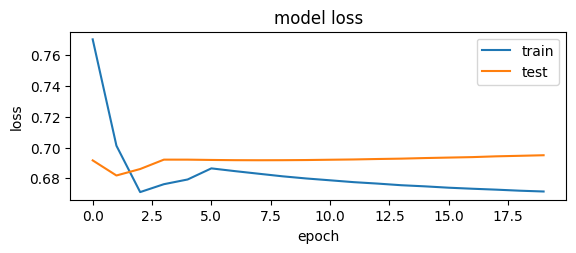

In [42]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')